24360
29675
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      7308
           1       0.66      0.71      0.69      8903

    accuracy                           0.64     16211
   macro avg       0.64      0.63      0.63     16211
weighted avg       0.64      0.64      0.64     16211



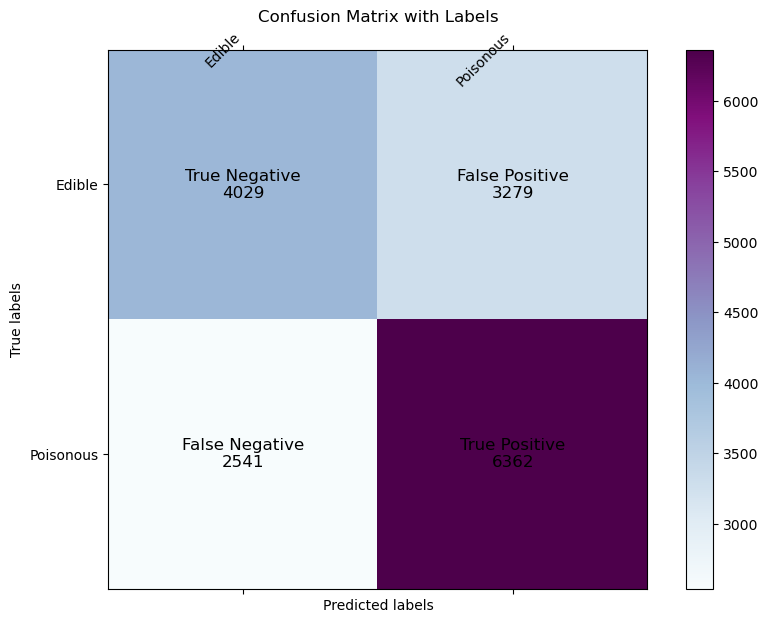

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
mushrooom_data = pd.read_csv("data/mushroom_cleaned.csv")
y = mushrooom_data['class'] # Target variable
x = mushrooom_data.iloc[:,:-1]
# sns.heatmap(x.corr(), annot=True)

stratified_shuffle_split  = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=142)

index_training_data, index_test_data = next(stratified_shuffle_split.split(x, y))

x_train_set = mushrooom_data.loc[index_training_data, x.columns]
y_train_ = mushrooom_data.loc[index_training_data, "class"]

x_test_set = mushrooom_data.loc[index_test_data, x.columns]
y_test_ = mushrooom_data.loc[index_test_data, "class"]

model = LogisticRegressionCV(Cs=10,cv=3,penalty='l1',solver='liblinear',random_state=142)
print((y ==0).sum())
print((y ==1).sum())
model.fit(x_train_set,y_train_)

predict = model.predict(x_test_set)

print(classification_report(y_test_, predict))
conf_matrix = confusion_matrix(y_test_, predict)

class_names = ['Edible', 'Poisonous']

# Define the labels for the matrix
labels = [["True Negative", "False Positive"], ["False Negative", "True Positive"]]

# Plotting the confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.matshow(conf_matrix, cmap='BuPu')
plt.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, f"{labels[i][j]}\n{conf_matrix[i, j]}",
                ha="center", va="center", color="black", fontsize=12)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix with Labels')
plt.show()
